In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from glob import glob
import json
import os
import sys
sys.path.append(os.path.abspath(os.getcwd() + "./../"))

%matplotlib inline

In [2]:
batch_num = 40000
Randfiles = glob("./copy/Random2/*-{}.json".format(batch_num))
Randfiles

['./copy/Random2/copy-task-1-batch-40000.json']

In [3]:
batch_num = 40000
Constfiles = glob("./copy/Constant/*-{}.json".format(batch_num))
Constfiles

['./copy/Constant/copy-task-1-batch-40000.json']

In [4]:
Rhistory = [json.loads(open(fname, "rt").read()) for fname in Randfiles]
Rtraining = np.array([(x['cost'], x['loss'], x['seq_lengths']) for x in Rhistory])
print("Training history (seed x metric x sequence) =", Rtraining.shape)

Training history (seed x metric x sequence) = (1, 3, 40000)


In [5]:
Chistory = [json.loads(open(fname, "rt").read()) for fname in Constfiles]
Ctraining = np.array([(x['cost'], x['loss'], x['seq_lengths']) for x in Chistory])
print("Training history (seed x metric x sequence) =", Ctraining.shape)

Training history (seed x metric x sequence) = (1, 3, 40000)


In [6]:
dv = 1000
Rtraining = Rtraining.reshape(len(Randfiles), 3, -1, dv).mean(axis=3)
print(Rtraining.shape)


(1, 3, 40)


In [7]:
Ctraining = Ctraining.reshape(len(Constfiles), 3, -1, dv).mean(axis=3)
print(Ctraining.shape)

(1, 3, 40)


In [8]:
Rtraining_mean = Rtraining.mean(axis=0)
Rtraining_std = Rtraining.std(axis=0)
print(Rtraining_mean.shape)
print(Rtraining_std.shape)
Ctraining_mean = Ctraining.mean(axis=0)
Ctraining_std = Ctraining.std(axis=0)
print(Ctraining_mean.shape)
print(Ctraining_std.shape)




(3, 40)
(3, 40)
(3, 40)
(3, 40)


Text(0.5, 1.0, 'Random vs Constant Training Convergence')

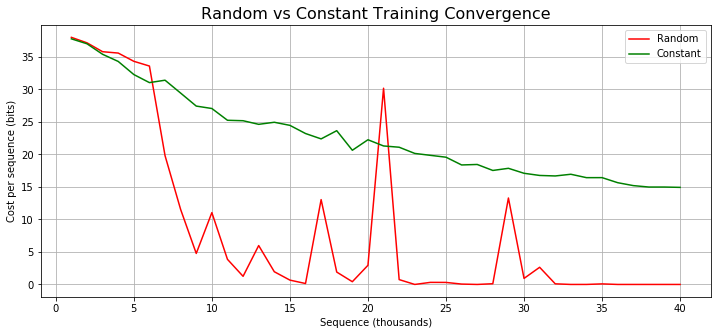

In [9]:
fig = plt.figure(figsize=(12, 5))

# X axis is normalized to thousands
x = np.arange(dv / 1000, (batch_num / 1000) + (dv / 1000), dv / 1000)
plt.plot(x,Rtraining_mean[0],color='r', label='Random')
# plt.yticks(np.arange(0, Rtraining[0][0]+5, 5))
plt.plot(x,Ctraining_mean[0],color='g', label='Constant')
plt.grid()
# plt.yticks(np.arange(0, training_mean[0][0]+5, 5))
plt.legend()
plt.ylabel('Cost per sequence (bits)')
plt.xlabel('Sequence (thousands)')
plt.title('Random vs Constant Training Convergence', fontsize=16)